# Netflix Titles Exploratory Data Analysis 
**BY:** Shreya Srivastava

This notebook covers data cleaning and visualization on Netflix Titles to find trends in content type , genres , etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the Data 

We start by loading the Netflix dataset 

In [2]:
df = pd.read_csv("C:/Users/Shreya3.Srivastava/PythonProject1/Netflix Project 1/netflix_titles.csv" )



# Cleaning the Data 

In this section , we clean data by removing duplicates , handling missing values , and creating new columns

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df=df.astype({'date_added':'datetime64[ns]','show_id':'string'})
df['Year']=df['date_added'].dt.year
df['Month']=df['date_added'].dt.month
df['duration_time']=df['duration'].str.split(' ',expand=True)[0]
df['duration_length']=df['duration'].str.split(' ',expand=True)[1]
df['rating']=df['rating'].str.strip()
df['rating']=df['rating'].astype(str)
df['rating']=df['rating'].str.replace(' ','-', regex=True)
df['rating']=df['rating'].str.replace('UR','UnderRated',regex=True)
df['rating']=df['rating'].fillna('Unknown')
df['country']=df['country'].str.split(',',expand=True)[0]
df['country']=df['country'].str.replace('USA','United States',)
df['country']=df['country'].fillna('Not Specified')
df['country']=df['country'].str.strip()
get_dummies=df['listed_in'].str.get_dummies(sep=', ')
df=pd.concat([df,get_dummies],axis=1)

# Content Type Distribution

This pie chart shows the distribution of Movies VS Tv Shows

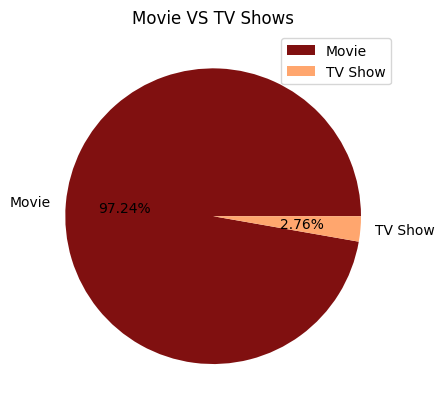

In [4]:
count_type=df['type'].value_counts()
color=['#801010','#FFA66E']
plt.pie(count_type , labels=count_type.index, autopct='%1.2f%%',colors=color)
plt.title("Movie VS TV Shows")
plt.legend(count_type.index , loc='best')

plt.show()

# Titles added per Year 

This line chart shows how many netflix shows or movies were added over the years

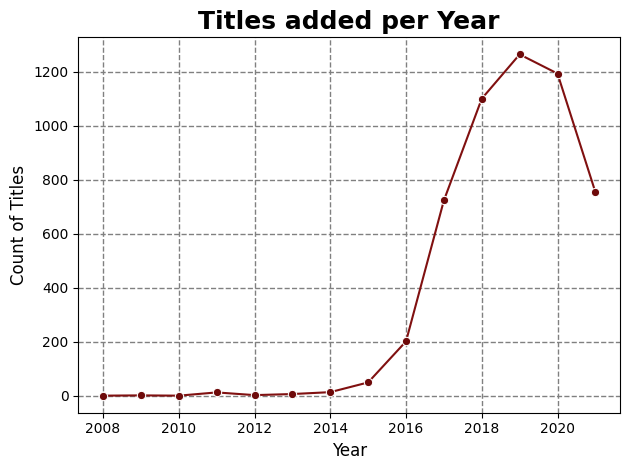

In [5]:
count_title=df['Year'].value_counts().sort_index()
count_df =count_title.reset_index()
count_df.columns = ['Year', 'Count']
sns.lineplot(x=count_title.index,y=count_title.values,color='#801010', marker='o', markerfacecolor= '#6E0A0A')
plt.title("Titles added per Year" , fontsize=18,fontweight='bold')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count of Titles',fontsize=12)
plt.grid(color='#808080', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig("visual2.png",transparent=True)
plt.show()

# Movie Rating Distribution 

This plot shows distribution of movies according to Rating and also displays the counts

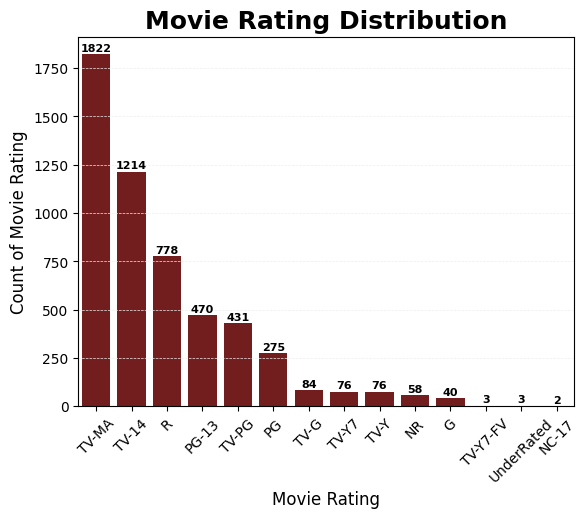

In [6]:
sorted_order=df['rating'].value_counts().index
ax=sns.countplot(x='rating',data = df , color='#801010' ,order=sorted_order)
plt.title("Movie Rating Distribution",fontsize=18,fontweight='bold')
plt.xlabel('Movie Rating',fontsize=12)
plt.ylabel('Count of Movie Rating',fontsize=12)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    x= bar.get_x() + bar.get_width() / 2
    ax.text(x,height+5,str(int(height)),ha='center',va='bottom',fontsize=8,fontweight='bold')

plt.grid(axis='y' ,color='#eeeeee', linestyle='--', linewidth=0.5,alpha=1)
plt.savefig("visual3.png",transparent=True)
plt.show()

#  Top 10 Countries Producing Netflix Content

This bar chart displays the top 10 countries that have produced the most content on Netflix. It helps us understand which regions are contributing the most to Netflix's global library.

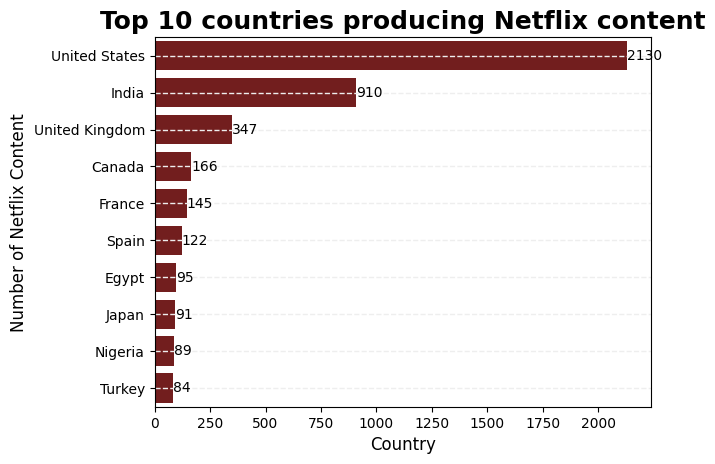

In [7]:
count_of_countries=df['country'].value_counts().head(10)
ax=sns.barplot(x=count_of_countries.values,y=count_of_countries.index,color='#801010')
plt.title("Top 10 countries producing Netflix content",fontsize=18,fontweight='bold')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of Netflix Content',fontsize=12)
plt.grid(axis='y' ,color='#eeeeee', linestyle='--', linewidth=1)
for bar in ax.patches:
    width = bar.get_width()
    y=bar.get_y() + bar.get_height() / 2
    ax.text(width,y,str(int(width)),ha='left',va='center')
plt.savefig("visual4.png", transparent=True)
plt.show()

# Movie vs TV Show Releases Over Time

This line chart shows how the number of Movies and TV Shows released on Netflix has changed over the years. It highlights content trends, such as growth periods or shifts in focus between movies and shows.

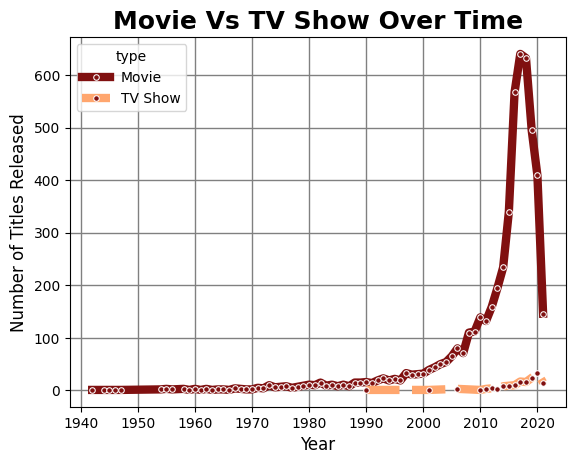

<Figure size 1500x800 with 0 Axes>

In [8]:
group_by_year= df.groupby(['release_year','type']).size().unstack()
color=['#801010','#FFA66E']
sns.lineplot(data=group_by_year,palette=color,marker='o',markersize=4,lw=6,markeredgecolor='white', markerfacecolor='#801010')
plt.title('Movie Vs TV Show Over Time',fontsize=18,fontweight='bold')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Titles Released',fontsize=12)
plt.grid(color='#808080', linestyle='-', linewidth=1)
plt.figure(figsize=(15, 8))
plt.savefig("visual5.png",transparent=True)
plt.show()

# Genre Distribution 

This chart shows the most common genres (listed in the "listed_in" column) of content available on Netflix. It helps us understand what types of shows and movies dominate the platform — such as Dramas, Comedies, Documentaries, etc.

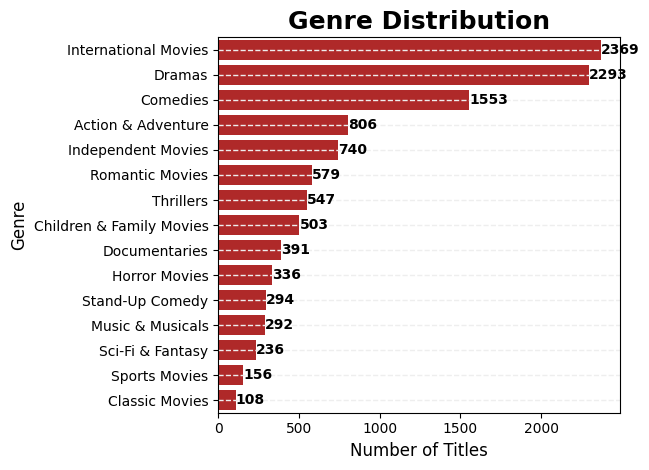

In [9]:
genre_distribution=df['listed_in'].str.split(', ',expand=True).unstack()
count_of_titles= genre_distribution.value_counts().head(15)
ax=sns.barplot(x=count_of_titles.values,y=count_of_titles.index,color='#C51313')
plt.title('Genre Distribution',fontsize=18,fontweight='bold')
plt.xlabel('Number of Titles',fontsize=12)
plt.ylabel('Genre',fontsize=12)
plt.tight_layout()
plt.grid(axis='y' ,color='#eeeeee', linestyle='--', linewidth=1)
for bar in ax.patches:
    width = bar.get_width()
    y=bar.get_y() + bar.get_height() / 2
    ax.text(width,y,str(int(width)),ha='left',va='center',weight='bold')
plt.savefig("visual6.png",transparent=True)
plt.show()

# Duration Comparison: Movies vs TV Shows

This visualization compares the duration of Movies and TV Shows on Netflix.  
- For Movies, duration is measured in **minutes**.  
- For TV Shows, it's the number of **seasons**.

We analyze each type separately to better understand content length trends.

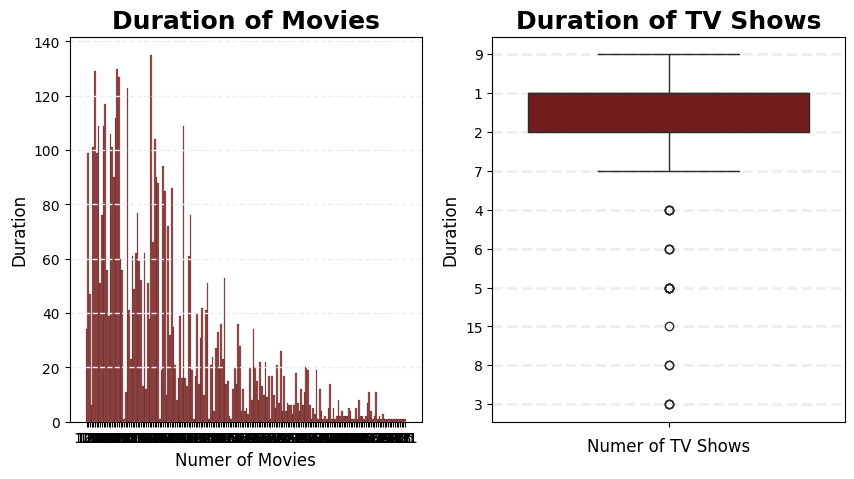

In [10]:
Movies_data=df[df['type']=='Movie']
TV_show_data=df[df['type']=='TV Show']


fig,axes=plt.subplots(1,2, figsize=(10,5))
axes[0]=sns.histplot(x=Movies_data['duration_time'],ax=axes[0],color='#801010')
axes[1]=sns.boxplot(y=TV_show_data['duration_time'],ax=axes[1],color='#801010')
axes[0].set_title("Duration of Movies",fontsize=18,fontweight='bold')
axes[0].set_xlabel("Numer of Movies",fontsize=12)
axes[0].set_ylabel("Duration",fontsize=12)
axes[0].grid(axis='y' ,color='#eeeeee', linestyle='--', linewidth=1)
axes[1].set_title("Duration of TV Shows",fontsize=18,fontweight='bold')
axes[1].set_xlabel("Numer of TV Shows",fontsize=12)
axes[1].set_ylabel("Duration",fontsize=12)
axes[1].grid(axis='y' ,color='#eeeeee', linestyle='--', linewidth=2)
plt.savefig("visual7.png",transparent=True)
plt.show()